<a href="https://colab.research.google.com/github/geraldoferreira1963/MVP_Analise_Dados/blob/main/MVP_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#########################################################
# Objetivo do trabalho :
#
#
#
######################################################

# carregando os módulos e bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
#from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# carregar datasets
# Agrofood_co2_emission.csv : dataset criado a partir da fusão e reprocessamento de diversos dados individuais
# world food production.csv

file_1='drive/MyDrive/dataset/Agrofood_co2_emission.csv'
file_2='drive/MyDrive/dataset/world food production.csv'


food_co2_emission=pd.read_csv(file_1)
df_food_production_1=pd.read_csv(file_2)

# selecionado o periodo (1994 - 2020) para a análise dos dados

df_co2_1= food_co2_emission[food_co2_emission.Year > 1994]
# df_co2_2 = co2_emission[co2_emission.Year > 1994]
df_food_1=df_food_production_1[df_food_production_1.Year > 1994]

print('Campos do Dataset de Emissão CO2 - Produção de Alimento','\n\n',df_co2_1.columns,'\n\n',df_co2_1.dtypes)
# print('\n\n\n\n','Campos do Dataset da Emissão CO2 - Diversas Fontes','\n\n',df_co2_2.columns,'\n\n',df_co2_2.dtypes)
print('\n\n\n\n','Campos do Dataset de Produção de Alimentos','\n\n',df_food_1.columns,'\n\n',df_food_1.dtypes)

# renomear colunas em preparação para um merge

df_co2_1.rename({'Area': 'Country'}, axis=1, inplace=True)
df_food_1.rename({'Entity': 'Country'}, axis=1, inplace=True)



# padronizar nomes de paises

padronizar_nomes_paises_to=['United States of America','Russian Federation']
padronizar_nomes_paises_value=['United States','Russia']
df_co2_1=df_co2_1.replace(padronizar_nomes_paises_to,padronizar_nomes_paises_value)


# maiores produtores de alimentos
# fonte https://www.investopedia.com/articles/investing/100615/4-countries-produce-most-food.asp

maiores_produtores=['China', 'United States','Brazil', 'India']

colunas_merger = ('Country', 'Year')

# ajuste_unity ={'Year': 1000, 'Total': 1000, 'Coal': 1000, 'Oil': 1000, 'Gas': 1000,
#             'Cement': 1000, 'Flaring': 1000, 'Other': 1000, 'Per Capita': 1000}

# df=pd.merge(left=df_co2_1,right=df_co2_2,left_on='Area',right_on='Country')
df=pd.merge(left=df_co2_1,right=df_food_1,on=colunas_merger)



Campos do Dataset de Emissão CO2 - Produção de Alimento 

 Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object') 

 Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires          

<ipython-input-2-c77d0791314f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2_1.rename({'Area': 'Country'}, axis=1, inplace=True)
<ipython-input-2-c77d0791314f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food_1.rename({'Entity': 'Country'}, axis=1, inplace=True)


In [21]:
# verificando presença de campos nulos ou N/A nos dados dos maiores produtores de alimentos

for pais in maiores_produtores:
  print('\n,\n,\n', 'verificando null e na : ',  pais, '\n\n' , df[df.Country == pais ].isna().sum())
  print('\n\n' , df[df.Country  == pais ].isnull().sum())


,
,
 verificando null e na :  China 

 Country                                0
Year                                   0
Savanna fires                          0
Forest fires                           0
Crop Residues                          0
Rice Cultivation                       0
Drained organic soils (CO2)            0
Pesticides Manufacturing               0
Food Transport                         0
Forestland                             0
Net Forest conversion                  0
Food Household Consumption             0
Food Retail                            0
On-farm Electricity Use                0
Food Packaging                         0
Agrifood Systems Waste Disposal        0
Food Processing                        0
Fertilizers Manufacturing              0
IPPU                                   0
Manure applied to Soils                0
Manure left on Pasture                 0
Manure Management                      0
Fires in organic soils                 0
Fires in humid tr

In [23]:
# coluna emissao e produção total

emissao_co2_cultivo = [ 'Crop Residues','Rice Cultivation', 'Drained organic soils (CO2)','Agrifood Systems Waste Disposal',
       'Manure applied to Soils','Manure left on Pasture', 'Manure Management','Fires in organic soils']

# seleção dos dados relacionados a emissão de CO2 na Cadeia de Alimentos
# fonte : https://www.fertisystem.com.br/m/blog/60d384532ab2c055dc7e9716/quais-sao-as-etapas-das-cadeias-produtivas-do-agronegocio-entenda#:~:text=Distribui%C3%A7%C3%A3o,e%20supermercados%2C%20por%20exemplo).

emissão_co2_cadeia_processamento_comida = ['Food Processing', 'Food Packaging']

emissão_co2_cadeia_fertilizantes_pesticidas = ['Fertilizers Manufacturing','Pesticides Manufacturing']

incendios=['Savanna fires', 'Forest fires','Fires in humid tropical forests']

culturas=['Maize Production (tonnes)', 'Rice  Production ( tonnes)','Yams  Production (tonnes)', 'Wheat Production (tonnes)',
       'Tomatoes Production (tonnes)', 'Tea  Production ( tonnes )','Sweet potatoes  Production (tonnes)',
       'Sunflower seed  Production (tonnes)', 'Sugar cane Production (tonnes)','Soybeans  Production (tonnes)',
        'Rye  Production (tonnes)','Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)',
       'Peas, dry Production ( tonnes)', 'Palm oil  Production (tonnes)', 'Grapes  Production (tonnes)', 'Coffee, green Production ( tonnes)',
       'Cocoa beans Production (tonnes)','Bananas  Production ( tonnes)', 'Avocados Production (tonnes)','Apples Production (tonnes)']

df['soma_emissao_co2_cultivo'] = df[emissao_co2_cultivo].sum(axis=1)
df['soma_emissao_co2_incendio']=df[incendios].sum(axis=1)
df['soma_emissao_co2_cadeia_processamento']=df[emissão_co2_cadeia_processamento_comida].sum(axis=1)
df['total_producao_cultivo']=df[culturas].sum(axis=1)
df['soma_emissao_co2_cadeia_fertilizantes_pesticidas']=df[emissão_co2_cadeia_fertilizantes_pesticidas].sum(axis=1)



# Nova seção



 Produção de Alimentos


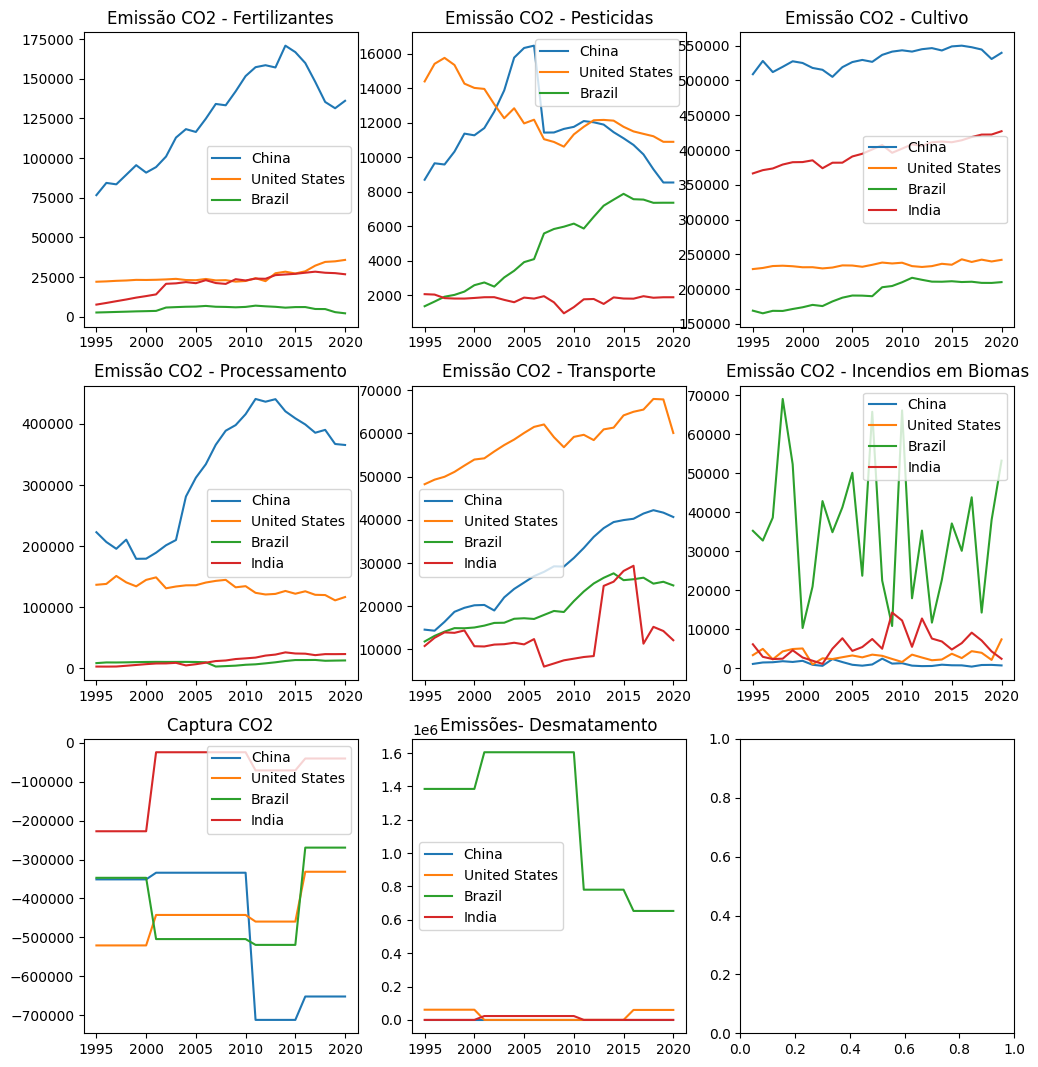

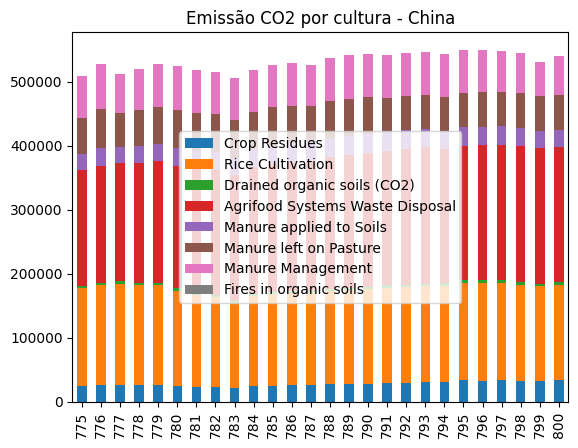

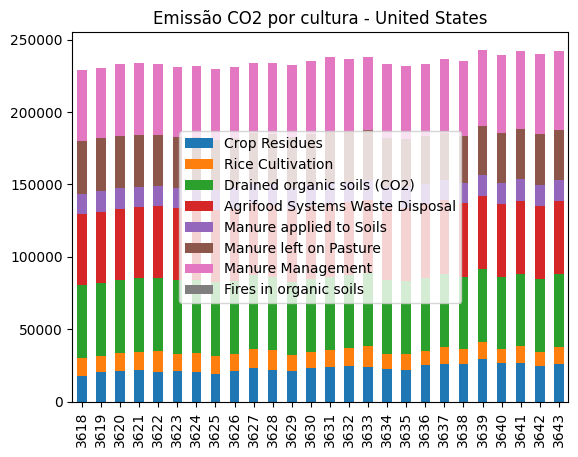

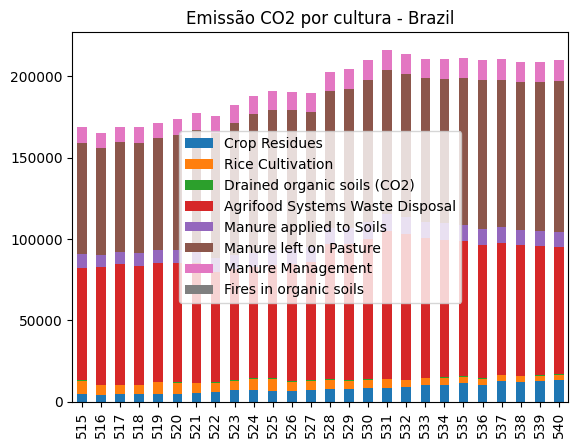

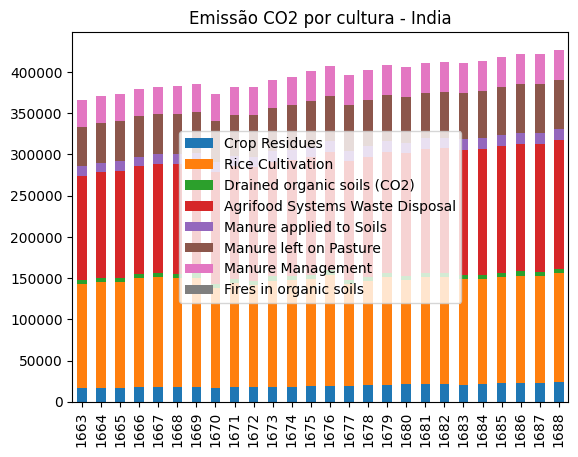

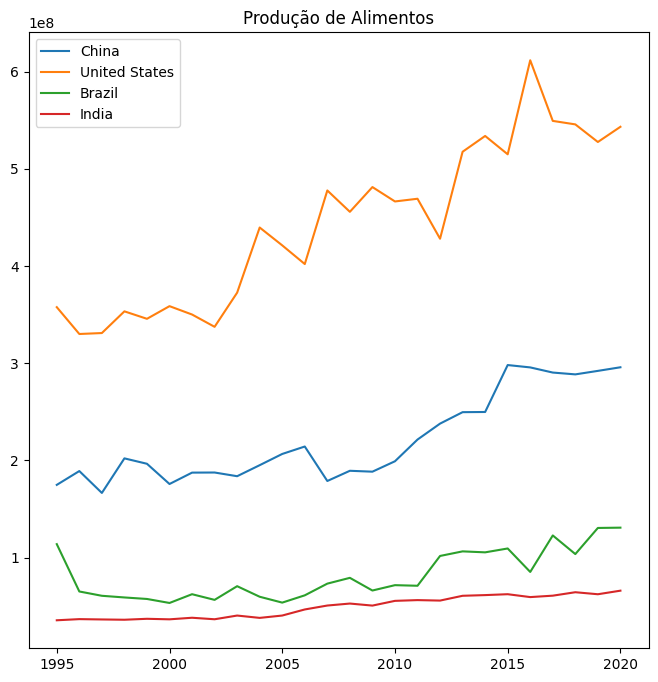

In [42]:
fig, ax = plt.subplots(3,3, figsize = (12, 13))


cores_paises_produtores = {'China' :'r', 'United States' :'b','Brazil':'y', 'India':'magenta'}

cores_incendios={'Savanna fires':'r', 'Forest fires':'b','Fires in humid tropical forests':'gray'}

for pais in maiores_produtores:
    ax[0,0].legend(cores_paises_produtores)
    ax[0,0].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Fertilizers Manufacturing'], label=cores_paises_produtores)
    ax[0,0].set_title('Emissão CO2 - Fertilizantes')
    ax[0,1].legend(cores_paises_produtores)
    ax[0,1].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Pesticides Manufacturing'], label=cores_paises_produtores)
    ax[0,1].set_title('Emissão CO2 - Pesticidas')
    ax[0,2].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'soma_emissao_co2_cultivo'], label=cores_paises_produtores)
    ax[0,2].set_title('Emissão CO2 - Cultivo')
    ax[0,2].legend(cores_paises_produtores)
    ax[1,0].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'soma_emissao_co2_cadeia_processamento'], label=cores_paises_produtores)
    ax[1,0].set_title('Emissão CO2 - Processamento')
    ax[1,0].legend(cores_paises_produtores)
    ax[1,1].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Food Transport'], label=cores_paises_produtores)
    ax[1,1].set_title('Emissão CO2 - Transporte')
    ax[1,1].legend(cores_paises_produtores)
    ax[1,2].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'soma_emissao_co2_incendio'], label=cores_paises_produtores)
    ax[1,2].set_title('Emissão CO2 - Incendios em Biomas')
    ax[1,2].legend(cores_paises_produtores)
    ax[2,0].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Forestland'], label=cores_paises_produtores)
    ax[2,0].set_title('Captura CO2')
    ax[2,0].legend(cores_paises_produtores)
    ax[2,1].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Net Forest conversion'], label=cores_paises_produtores)
    ax[2,1].set_title('Emissões- Desmatamento')
    ax[2,1].legend(cores_paises_produtores)

for pais in maiores_produtores:
  ax= df[df.Country == pais].loc[:,emissao_co2_cultivo].plot(kind='bar', title = 'Emissão CO2 por cultura - ' + pais ,stacked=True)
  ax.legend(loc=10)


print('\n\n', 'Produção de Alimentos')

fig, ax = plt.subplots(1,1, figsize = (8, 8))

for pais in maiores_produtores:

    ax.plot(df['Year'].unique(),df[df.Country == pais].loc[:,'total_producao_cultivo'], label=cores_paises_produtores)
    ax.set_title('Produção de Alimentos')
    ax.legend(cores_paises_produtores)


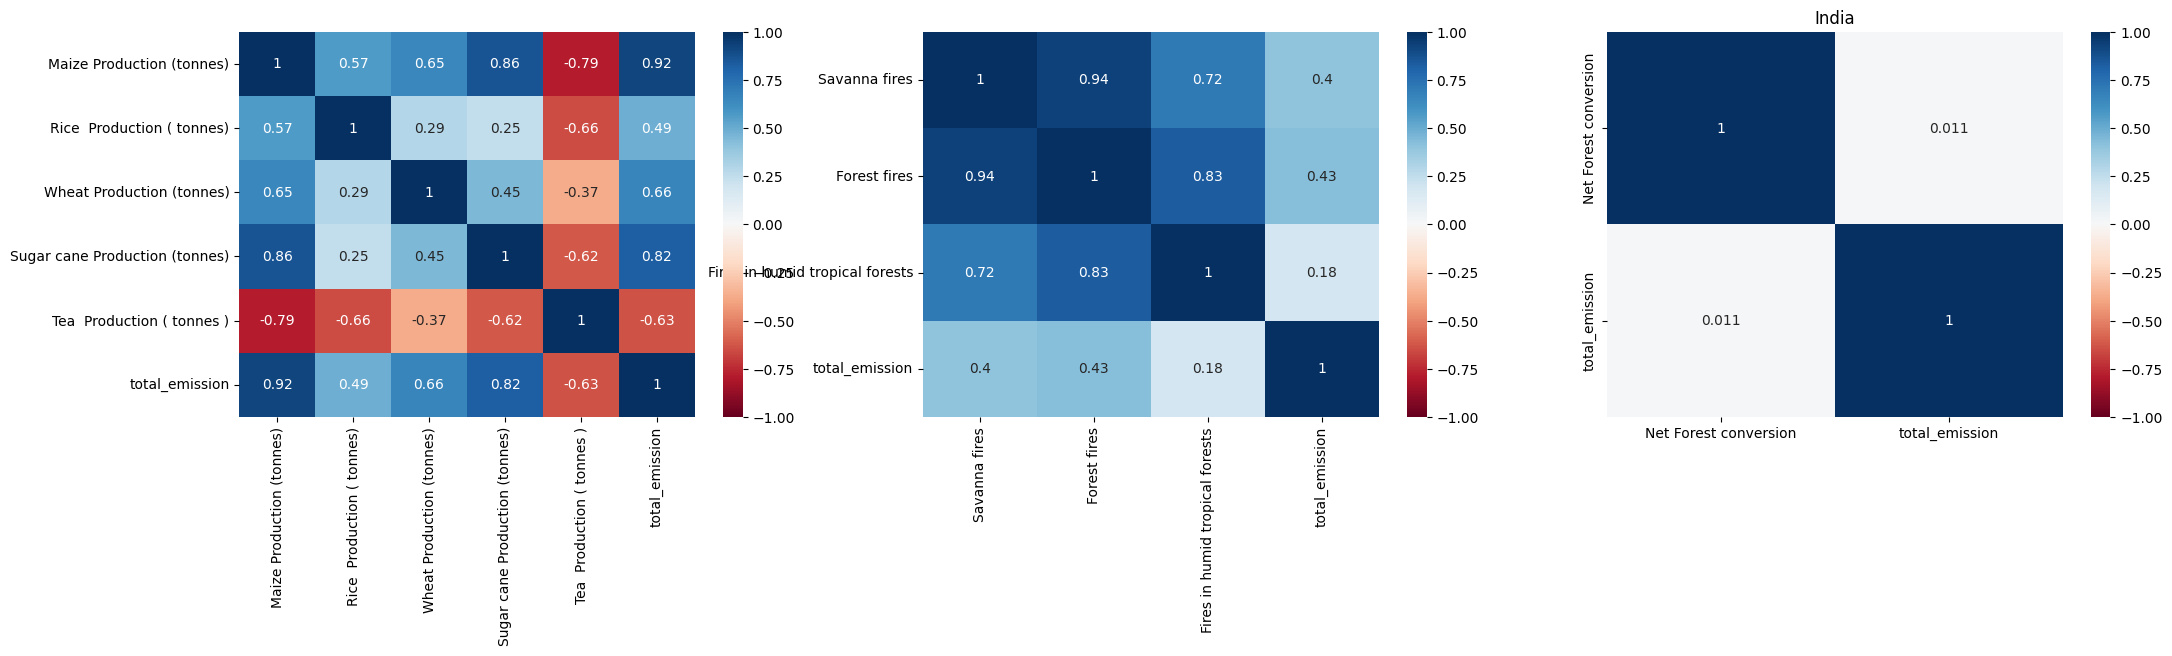

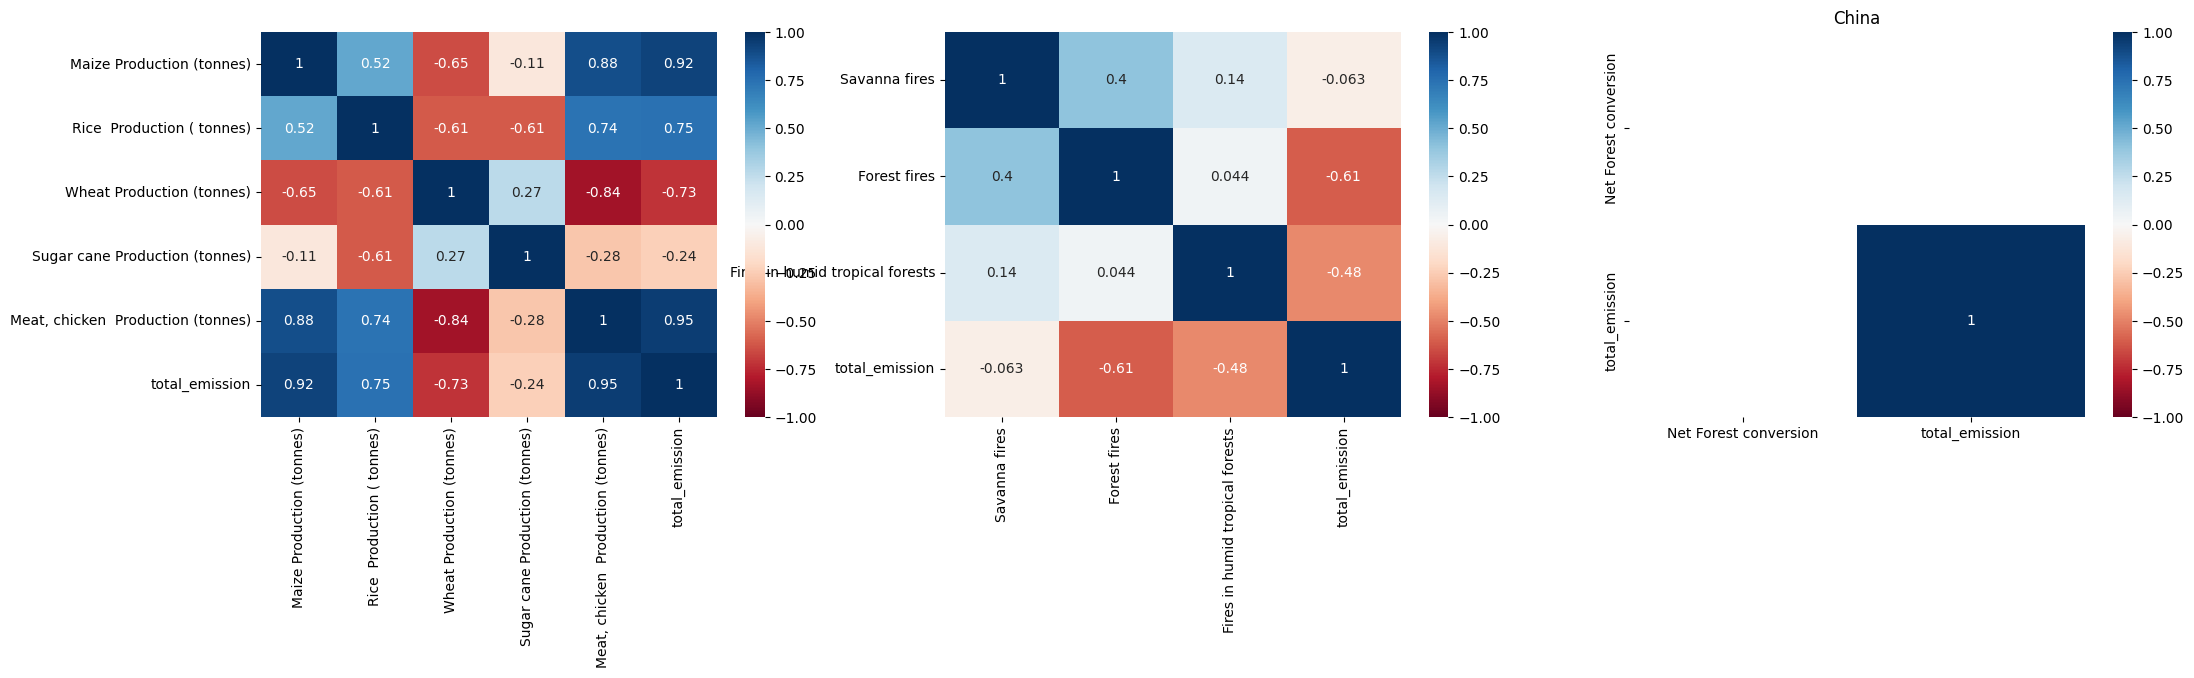

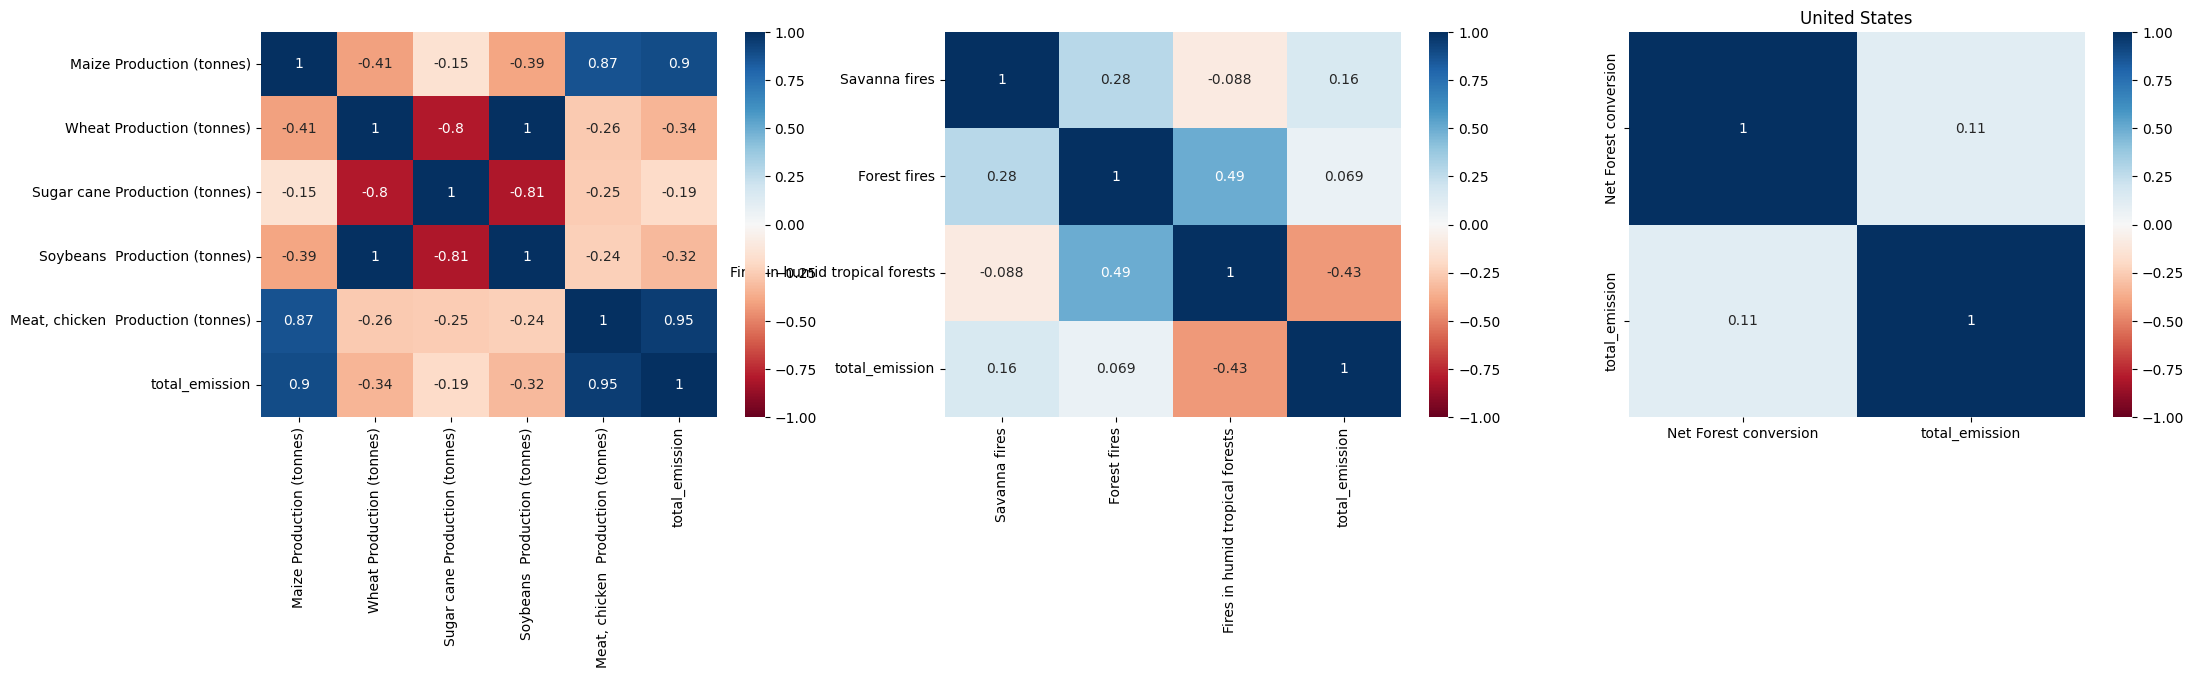

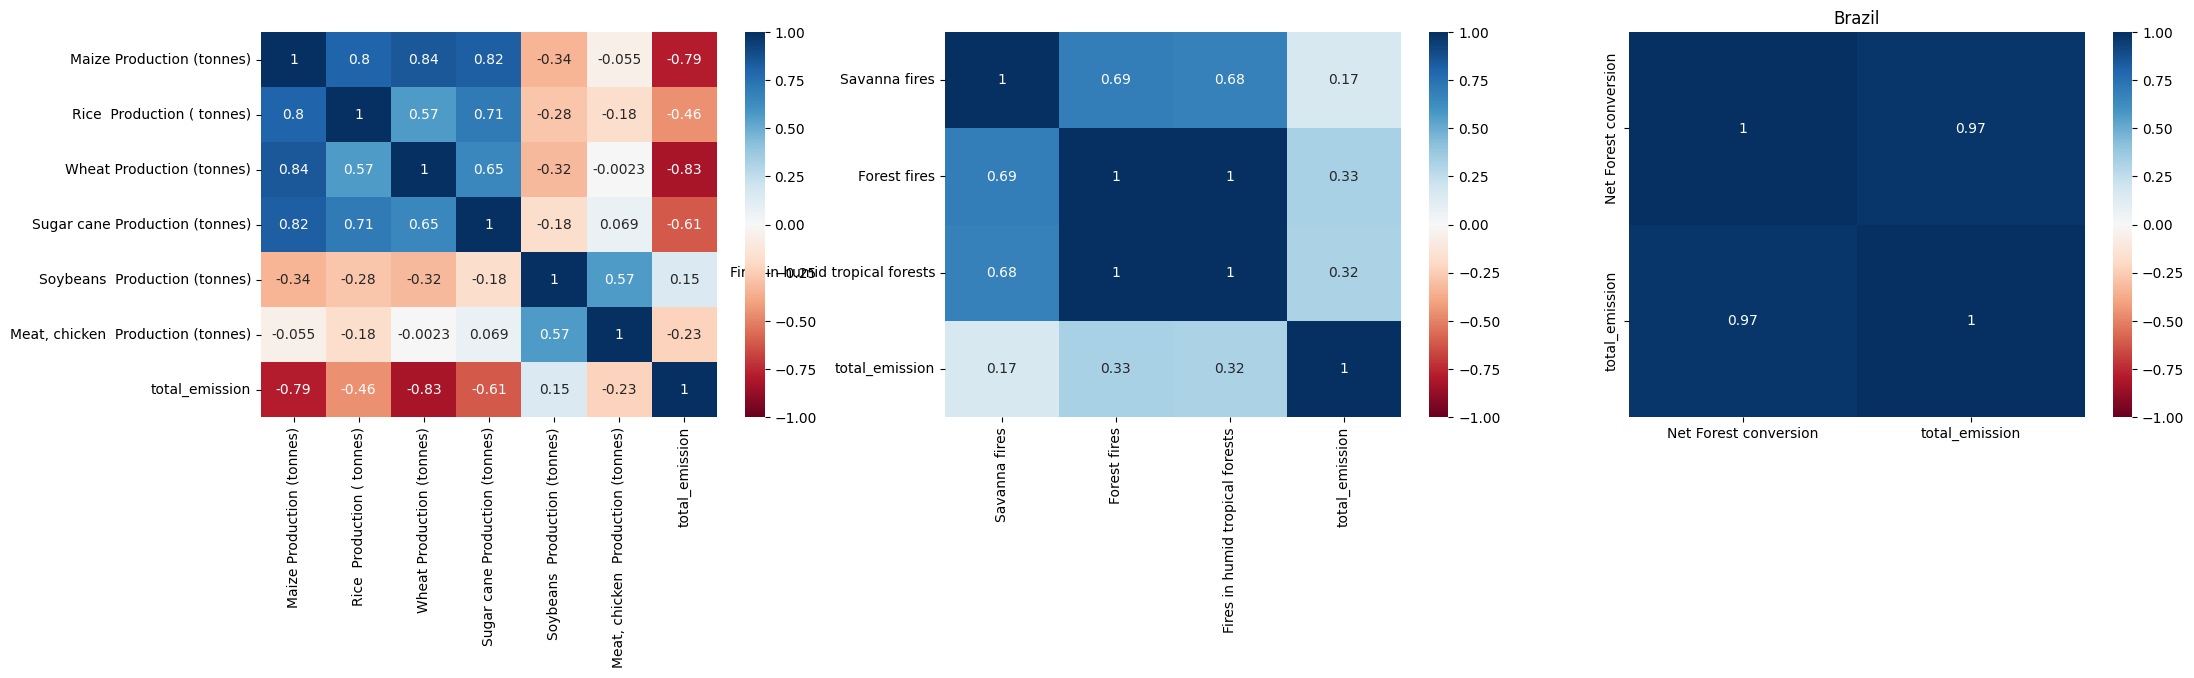

In [61]:
# principais produtos dos 4 maiores produtores
# fontes
# India ==> https://pt.wikipedia.org/wiki/Economia_da_%C3%8Dndia#:~:text=Os%20principais%20produtos%20cultivados%20s%C3%A3o,monoculturas%20voltadas%20para%20a%20exporta%C3%A7%C3%A3o.
# China ==> https://pt.wikipedia.org/wiki/Agropecu%C3%A1ria_na_China
# EUA ==> https://pt.wikipedia.org/wiki/Economia_dos_Estados_Unidos#:~:text=O%20pa%C3%ADs%20tamb%C3%A9m%20%C3%A9%20o,na%20t%C3%A3o%20chamada%20Corn%20Belt.
# Brasil ==>

India_principais_produtos = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)','Wheat Production (tonnes)',
                             'Sugar cane Production (tonnes)','Tea  Production ( tonnes )','total_emission']
China_principais_produtos = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)','Wheat Production (tonnes)',
                             'Sugar cane Production (tonnes)','Meat, chicken  Production (tonnes)','total_emission']
EUA_principais_produtos = ['Maize Production (tonnes)', 'Wheat Production (tonnes)','Sugar cane Production (tonnes)',
                              'Soybeans  Production (tonnes)','Meat, chicken  Production (tonnes)','total_emission']
Brasil_principais_produtos = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)','Wheat Production (tonnes)',
                              'Sugar cane Production (tonnes)','Soybeans  Production (tonnes)', 'Meat, chicken  Production (tonnes)','total_emission']

Dicionario_paises = {'India':India_principais_produtos,'China':China_principais_produtos,'United States':EUA_principais_produtos,'Brazil':Brasil_principais_produtos}

incendios=['Savanna fires', 'Forest fires','Fires in humid tropical forests']

for pais in Dicionario_paises:
  fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (25, 5))
  sns.heatmap(df[df.Country == pais].loc[:,Dicionario_paises.get(pais)].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1,ax=ax1)
  sns.heatmap(df[df.Country == pais].loc[:,['Savanna fires', 'Forest fires','Fires in humid tropical forests','total_emission']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1,ax=ax2)
  sns.heatmap(df[df.Country == pais].loc[:,['Net Forest conversion','total_emission']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1,ax=ax3)
  plt.title(pais)
  plt.show()

